# Data Augmentation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [5]:
train_gen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    )

train_generator = train_gen.flow_from_directory(
    "G:/Covid-19_Detection_Using_X-Rays/home/covid_dataset/train",
    target_size=(224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 224 images belonging to 2 classes.


In [6]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [7]:
test_gen = ImageDataGenerator(rescale=1.0/255,)

test_generator = test_gen.flow_from_directory(
    "G:/Covid-19_Detection_Using_X-Rays/home/covid_dataset/test",
    target_size=(224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 60 images belonging to 2 classes.


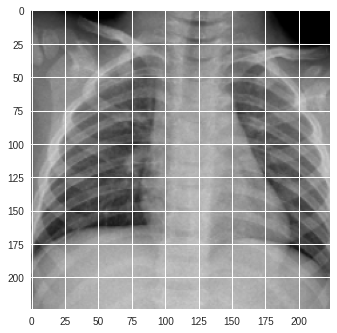

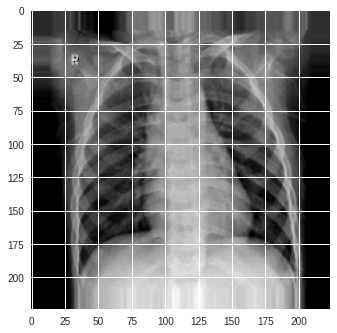

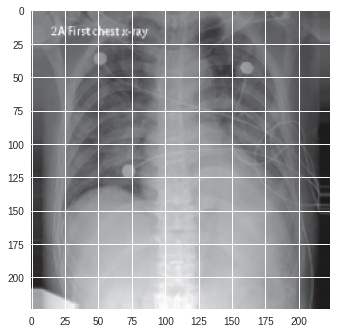

In [53]:
x,y = train_generator.next()
for i in range(3):
    plt.style.use("seaborn")
    plt.imshow(x[i])
    plt.show()

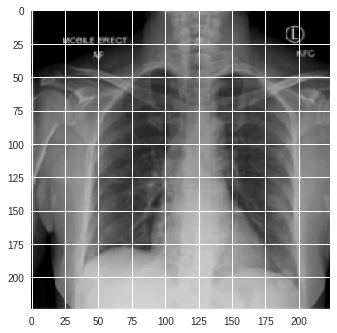

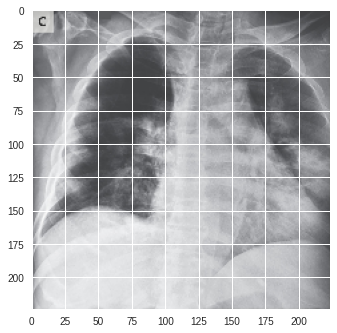

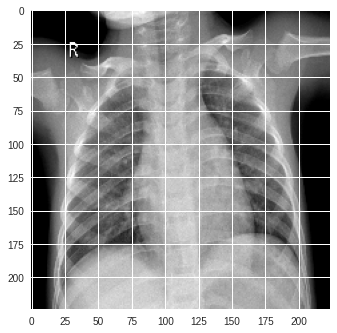

In [55]:
x,y = test_generator.next()
for i in range(3):
    plt.style.use("seaborn")
    plt.imshow(x[i])
    plt.show()

# CNN Model

In [0]:
from keras.models import Sequential
from keras.layers import *

In [0]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 54, 54, 64)       

In [0]:
from keras.callbacks import ModelCheckpoint

In [43]:
checkpoint = ModelCheckpoint("covid_model.hdf5",monitor='loss',save_best_only=True)

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 20,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks=[checkpoint]
)

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.6244 - accuracy: 0.5312 - val_loss: 0.6828 - val_accuracy: 0.5500
Epoch 2/20
7/7 [==============================] - 7s 1s/step - loss: 0.6349 - accuracy: 0.6295 - val_loss: 0.6328 - val_accuracy: 0.6667
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 0.4240 - accuracy: 0.8125 - val_loss: 0.3737 - val_accuracy: 0.8333
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.3332 - accuracy: 0.8527 - val_loss: 0.2421 - val_accuracy: 0.9500
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 0.2595 - accuracy: 0.9062 - val_loss: 0.2283 - val_accuracy: 0.9667
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.2468 - accuracy: 0.9107 - val_loss: 0.1593 - val_accuracy: 0.9667
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 0.2069 - accuracy: 0.9241 - val_loss: 0.1964 - val_accuracy: 0.9667
Epoch 8/20
7/7 [=========================